In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd #for csv
import scipy.io as sio
import math

from sklearn.linear_model import LogisticRegression

# load the information in the file in a format that python can interpret
matTrainData = sio.loadmat("train.mat")
matTestData = sio.loadmat("test.mat")
#print(matData)
#matData.items() # 得知有哪些 items

#如何 element wise concate
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html
trainDataX = np.concatenate((np.array(matTrainData["x1"]), np.array(matTrainData["x2"])), axis=1 )
#print(trainDataX)
trainDataY = np.concatenate(np.array(matTrainData["y"])).astype(int)
print(trainDataY)

testX = np.concatenate((np.array(matTestData["x1"]), np.array(matTestData["x2"])), axis=1 )
testY = np.concatenate(np.array(matTestData["y"]))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [3]:
### Q1-5 ###
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

logreg.fit(trainDataX, trainDataY)
predictY = logreg.predict(testX)
#print(predictY)
#print(testY)
print(logreg.intercept_)
print(logreg.coef_)
count = 0
for i in range(len(predictY)):
    if predictY[i] != testY[i]:
        count +=1
print("percentage of misclassified test samples: %d %%" % (count/len(predictY)*100))

[37.85898317]
[[-18.34633961  19.23702253]]
percentage of misclassified test samples: 3 %


In [5]:
### Q1-6 ###
#P(C|x) -> P(C^x)/P(x) = h(W) = 1/(1 + e**(-W0 -W1*x1 - W2*x2) )
##[-36.03185422  45.27976297  51.53652281]
#initial values
W0 = 35.0
W1 = -15.0
W2 = 15.0
lr = 1
iteration = 100000

W0Lr = 0.0
W1Lr = 0.0
W2Lr = 0.0

W0_history = [W0]
W1_history = [W1]
W2_history = [W2]    

#print(len(trainDataX)) #70

#print(trainDataX)
def logistic_func(s):
    return 1/(1+np.exp(-s))
def predict_logistic(weight , x):
    x = np.append(x,one)
    score = logistic_func(np.dot(weight,x))
    if score > 0.5:
        return 1
    else:
        return 0
#y = trainDataY[0]
#x = trainDataX[n,:]
#print(weight*y)
#print( logistic_func(-y*(np.dot(weight,x)  )*(-y*x) ) )

#fuick
weight = np.random.uniform(size=[3])
print(weight)
weight = np.array([W1, W2, W0])
one = np.array([1])

for i in range(iteration):
    W0Grad = 0.0
    W1Grad = 0.0
    W2Grad = 0.0
    
    if i % 1000 == 0:
        acc = 0
        for n in range(len(testX)):
            x = testX[n,:]
            y = testY[n]
            pred = predict_logistic(weight,x)
            if pred == y:
                acc+=1
        print(acc/len(testX))
            
            
        print(weight[2], weight[0], weight[1])
        #print(W0, W1, W2)
#        print(W0Lr, W1Lr, W2Lr)
    
    #計算 gradient
    grad = np.zeros([3])
    for n in range(len( trainDataX)):
        x = trainDataX[n,:]
        y = trainDataY[n]
        if y == 0:
            y = -1
        x = np.append(x,one)
        grad += logistic_func(-y*(np.dot(weight,x)  ))*(-y*x) 
    #print(grad)
    
    #grad /= len(trainDataX)
    weight -= lr * grad 
    #break
    
    
    
    
    #W0Lr += W0Grad ** 2
    #W1Lr += W1Grad ** 2
    #W2Lr += W2Grad ** 2
    
    #更新 gradient
    #W0 = W0 - lr * W0Grad
    #W1 = W1 - lr * W1Grad
    #W2 = W2 - lr * W2Grad
    
    # Store parameters for plotting
    W0_history.append(weight[2])
    W1_history.append(weight[0])
    W2_history.append(weight[1])
    


[0.33286101 0.7245289  0.19325399]
1.0
35.0 -15.0 15.0
0.9333333333333333
98.40788753362119 -433.11282828175575 737.3910337754263
0.9333333333333333
98.40788753306697 -433.1128282847116 737.391033773721
0.9333333333333333
98.40788753251275 -433.11282828766747 737.3910337720157
0.9333333333333333
98.40788753195852 -433.1128282906233 737.3910337703104
0.9333333333333333
98.4078875314043 -433.1128282935792 737.3910337686051
0.9333333333333333
98.40788753085008 -433.11282829653504 737.3910337668998
0.9333333333333333
98.40788753029585 -433.1128282994909 737.3910337651945
0.9333333333333333
98.40788752974163 -433.11282830244676 737.3910337634892
0.9333333333333333
98.4078875291874 -433.1128283054026 737.3910337617839
0.9333333333333333
98.40788752863318 -433.1128283083585 737.3910337600786
0.9333333333333333
98.40788752807896 -433.11282831131433 737.3910337583733
0.9333333333333333
98.40788752752474 -433.1128283142702 737.391033756668
0.9333333333333333
98.40788752697051 -433.11282831722605

In [6]:
print(weight)
print(logistic_func(-y*(np.dot(weight,x)  )*(-y*x) ))


[-433.11282857  737.39103361   98.40788748]
[6.29941526e-67 1.66660801e-37 5.50314752e-13]


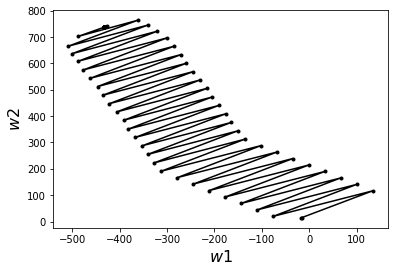

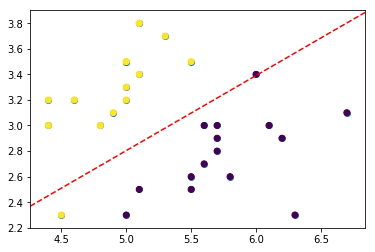

In [6]:
#plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')
plt.plot(W1_history, W2_history, 'o-', ms=3, lw=1.5, color='black')
#plt.xlim(-25,-15)
#plt.ylim(15,25)
plt.xlabel(r'$w1$', fontsize=16)
plt.ylabel(r'$w2$', fontsize=16)
plt.show()

plt.scatter(testX[:, 0], testX[:, 1])
x_min, x_max = testX[:, 0].min() - .5, testX[:, 0].max() + .5
y_min, y_max = testX[:, 1].min() - .5, testX[:, 1].max() + .5
x1 = np.linspace(x_min, x_max, 1000)
x2 = np.linspace(y_min, y_max, 1000)
#0.5 = logistic_func(np.dot(weight,x))


# w[1] * y = w[0] * x + b 
# to solve for y
y = (weight[0] * x1)/weight[1] + weight[2] / weight[1]

plt.scatter(testX[:,0], testX[:,1], c=testY.reshape(-1))
ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = -(x_vals * weight[0] + weight[2])/weight[1]
plt.plot(x_vals, y_vals, '--', c="red")

plt.show()
